In [2]:
import matplotlib.pyplot as plt
from glob import glob
import igraph as ig

In [4]:
paths = [0.1, 0.75, 0.5]
small = {}
for path in glob("small/*_0.750000.txt"):
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    label = paths.pop()
    print(label)
    small[label] = values    

BA/smallBA_0.500000.txt
0.5
BA/smallBA_0.750000.txt
0.75
BA/smallBA_0.100000.txt
0.1


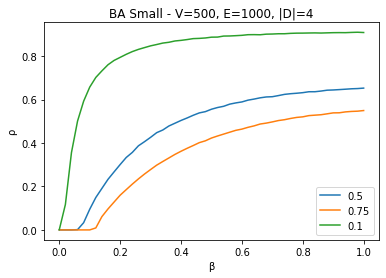

In [ ]:
x = [i/50 for i in range(len(WS_small[0.5]))]
for k, v in WS_small.items():
    plt.plot(x, v, label=k)
plt.title("V=500, E=1000, α=0.5, |D|=4")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
medium = {}
for path in glob("medium/*_0.750000.txt"):
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    label = paths.pop()
    print(label)
    WS_medium[label] = values    

BA/mediumBA_0.100000.txt
0.1
BA/mediumBA_0.750000.txt
0.75
BA/mediumBA_0.500000.txt
0.5


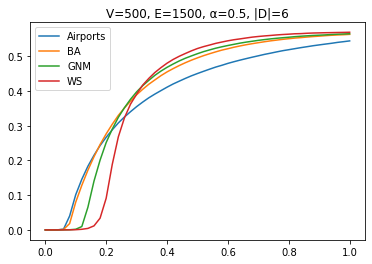

In [ ]:
x = [i/50 for i in range(len(WS_medium[0.5]))]
for k, v in WS_medium.items():
    plt.plot(x, v, label=k)
plt.title("V=500, E=1500, α=0.5, |D|=6")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
big = {}
for path in glob("big/*_0.750000.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    label = paths.pop()
    print(label)
    WS_big[label] = values

BA/bigBA_0.750000.txt
0.75
BA/bigBA_0.500000.txt
0.5
BA/bigBA_0.100000.txt
0.1


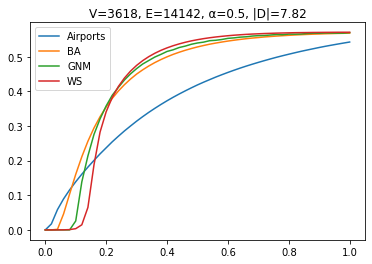

In [ ]:
x = [i/50 for i in range(len(WS_big[0.5]))]
for k, v in WS_big.items():
    plt.plot(x, v, label=k)
plt.title("BA Big - V=500, E=1000")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
small = {}
for path in glob("small/*0.750000.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    small[path[11:path.find("_")]] = values

In [ ]:
x = [i/50 for i in range(len(small["BA"]))]
for k, v in small.items():
    plt.plot(x, v, label=k)
plt.title("Small - V=500, E=1000, |D|=4")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
medium = {}
for path in glob("medium/*0.750000.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    medium[path[13:path.find("_")]] = values

In [ ]:
x = [i/50 for i in range(len(medium["BA"]))]
for k, v in medium.items():
    plt.plot(x, v, label=k)
plt.title("Medium - V=500, E=1500, |D|=6")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
big = {}
for path in glob("big/*0.750000.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    big[path[7:path.find("_")]] = values

In [ ]:
x = [i/50 for i in range(len(big["BA"]))]
for k, v in big.items():
    plt.plot(x, v, label=k)
plt.title("V=3618, E=14142, α=0.5, |D|=7.82")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

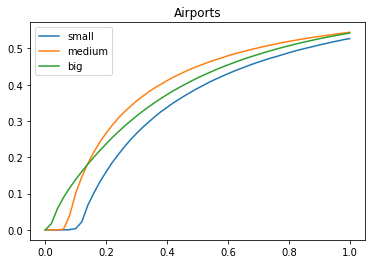

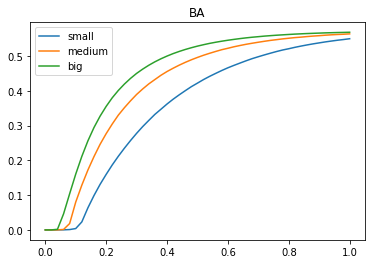

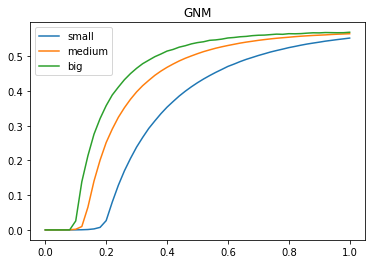

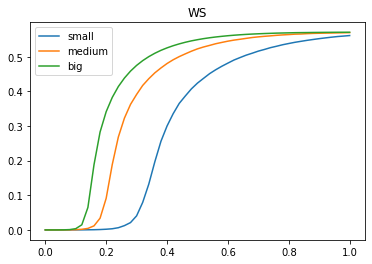

In [ ]:
x = [i/50 for i in range(len(small["BA"]))]
for k in small.keys():
    plt.plot(x, small[k], label='small')
    plt.plot(x, medium[k], label='medium')
    plt.plot(x, big[k], label='big')
    #mmca_res = [mmca(0.5, i) for i in x]
    #plt.plot(x, mmca_res, label='mmca_res')
    plt.title(k)
    plt.xlabel('β')
    plt.ylabel('ρ')
    plt.legend()
    plt.show()

In [5]:
def plot(size='small', a=0.5):
    x = [i/50 for i in range(51)]
    plots = {}
    for path in glob(f"{size}/*_{a:<08}.txt"):    
        values = []
        with open(path, "r") as f:
            for line in f:
                values.append(float(line.rstrip().split()[1]))
        label = path[len(f'{size}\\{size}'):].split('_')[0]
        plt.plot(x, values, label=label)
    g = ig.load(path.split('_')[0] + '.net')
    vcount = g.vcount()
    ecount = g.ecount()
    plt.title(f"V={vcount}, E={ecount}, α={a}, |D|={round(2*ecount/vcount, 2)}")
    plt.legend()
    plt.show()

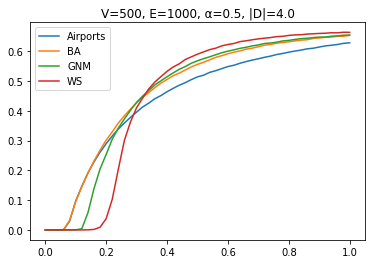

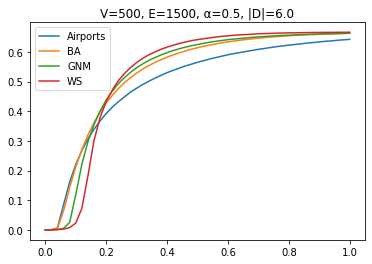

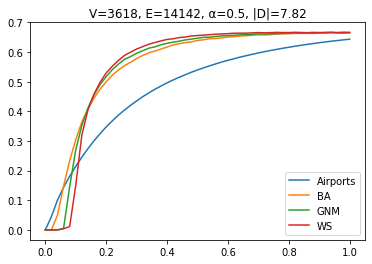

In [19]:
for size in ('small', 'medium', 'big'):
    for a in (0.5,):
        plot(size, a)